In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [3]:
X

array([[ 0.16917342,  0.09250554],
       [-0.02507996,  1.849823  ],
       [ 1.5001484 , -1.80189788],
       ...,
       [-3.07679139, -1.60598307],
       [-1.30287149, -3.00152549],
       [-1.30558059,  1.15409341]])

In [4]:
y

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [5]:
pd.DataFrame(X)[0]

0      0.169173
1     -0.025080
2      1.500148
3      0.455843
4      0.729715
         ...   
995   -0.219884
996    0.751649
997   -3.076791
998   -1.302871
999   -1.305581
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

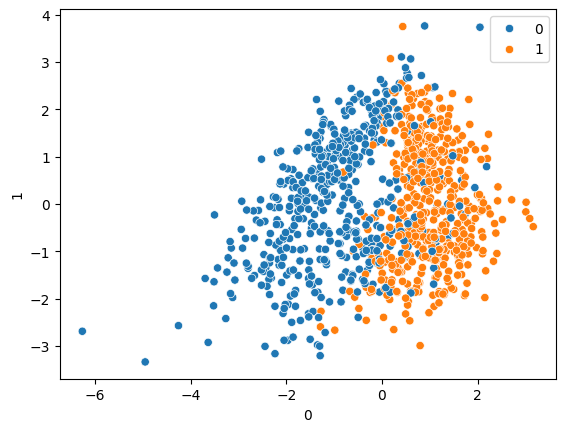

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [9]:
from sklearn.svm import SVC

In [11]:
svc=SVC(kernel='linear')

In [13]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
svc.coef_

array([[ 1.82520465, -0.20380621]])

In [15]:
y_pred=svc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       129
           1       0.85      0.95      0.89       121

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



In [22]:
print(accuracy_score(y_test,y_pred))

0.892


In [23]:
print(confusion_matrix(y_test,y_pred))

[[108  21]
 [  6 115]]


In [20]:
param_grid={
            'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
}

In [26]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.880 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.860 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.887 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.847 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.853 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [28]:
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.880 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.860 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.887 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.847 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.867 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.853 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

{'C': 0.1, 'gamma': 1}

In [29]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       129
           1       0.86      0.95      0.90       121

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[108  21]
 [  6 115]]


In [30]:
print(accuracy_score(y_test,y_pred))

0.892
